In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### 먼저 Train Data에 대해서 살펴보겠습니다

In [3]:
df = pd.read_csv('../dataset/train/train.csv')

In [4]:
df.head(5)

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


<AxesSubplot:xlabel='count', ylabel='label'>

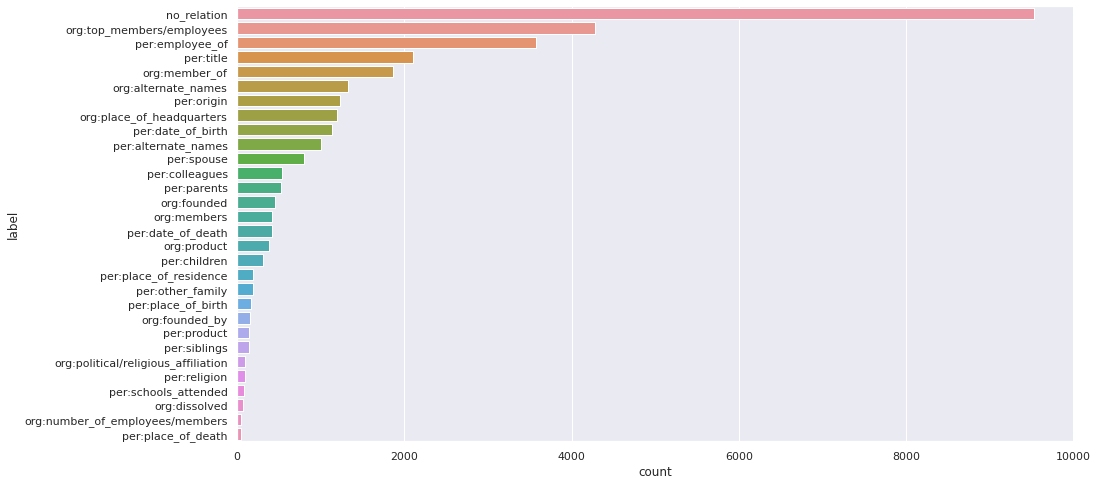

In [5]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)

In [6]:
df.head(5)

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [7]:
df['sentlen'] = df['sentence'].apply(lambda x: len(x))

455


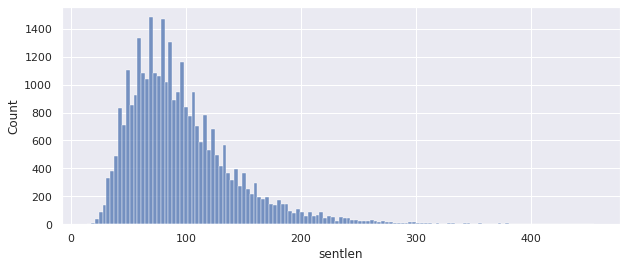

In [8]:
sns.set(rc = {'figure.figsize':(10,4)})
sns.histplot(x='sentlen', data=df)
print(max(df['sentlen']))

In [9]:
df['sentlen'].describe()

count    32470.000000
mean        97.083954
std         47.939902
min         14.000000
25%         64.000000
50%         87.000000
75%        118.000000
max        455.000000
Name: sentlen, dtype: float64

In [10]:
arr = []

for i in range(df.shape[0]):
    arr.append((eval(df['subject_entity'].iloc[i]))["type"])

df_sub = pd.DataFrame(arr)
df_sub.columns = ['type']   

<AxesSubplot:xlabel='count', ylabel='type'>

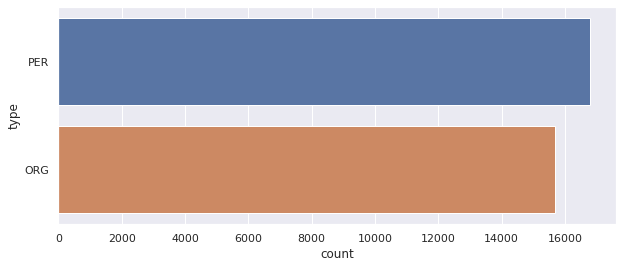

In [11]:
sns.set(rc = {'figure.figsize':(10,4)})
sns.countplot(y='type', data=df_sub, order=df_sub['type'].value_counts().index)


<AxesSubplot:xlabel='count', ylabel='type'>

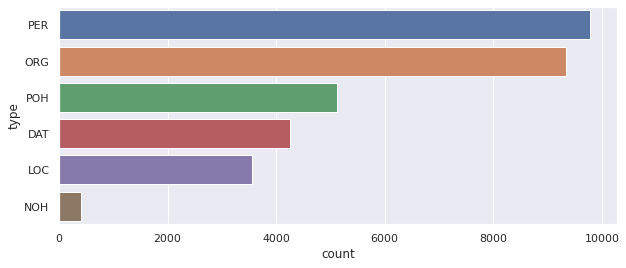

In [12]:
arr = []

for i in range(df.shape[0]):
    arr.append((eval(df['object_entity'].iloc[i]))["type"])

df_obj = pd.DataFrame(arr)
df_obj.columns = ['type']

sns.set(rc = {'figure.figsize':(10,4)})
sns.countplot(y='type', data=df_obj, order=df_obj['type'].value_counts().index)

In [13]:
df_test = pd.read_csv('../dataset/test/test_data.csv')
df_test.head(5) 

,id,sentence,subject_entity,object_entity,label,source
0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, ...","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_i...",100,wikitree
1,1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,"{'word': '프린세스 프링', 'start_idx': 7, 'end_idx':...","{'word': '공주', 'start_idx': 84, 'end_idx': 85,...",100,wikipedia
2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...","{'word': '경찰', 'start_idx': 121, 'end_idx': 12...","{'word': '1995년', 'start_idx': 31, 'end_idx': ...",100,wikipedia
3,3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,"{'word': '세조', 'start_idx': 78, 'end_idx': 79,...","{'word': '정창손', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia
4,4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...","{'word': '민주당', 'start_idx': 3, 'end_idx': 5, ...","{'word': '권영진', 'start_idx': 16, 'end_idx': 18...",100,wikitree


In [14]:
df_test['sentlen'] = df_test['sentence'].apply(lambda x: len(x))

455


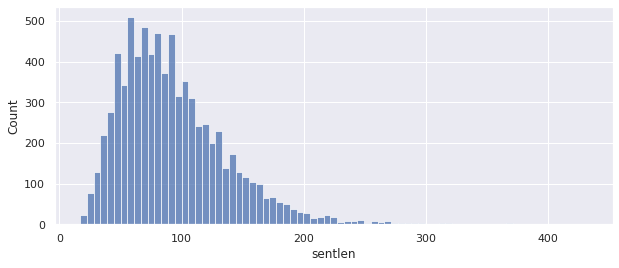

In [15]:
sns.set(rc = {'figure.figsize':(10,4)})
sns.histplot(x='sentlen', data=df_test)
print(max(df['sentlen']))

In [16]:
df_test['sentlen'].describe()

count    7765.000000
mean       92.964971
std        44.165781
min        17.000000
25%        61.000000
50%        85.000000
75%       116.000000
max       432.000000
Name: sentlen, dtype: float64

In [17]:
arr = []

for i in range(df_test.shape[0]):
    arr.append((eval(df_test['subject_entity'].iloc[i]))["type"])

df_test_sub = pd.DataFrame(arr)
df_test_sub.columns = ['type']   

<AxesSubplot:xlabel='count', ylabel='type'>

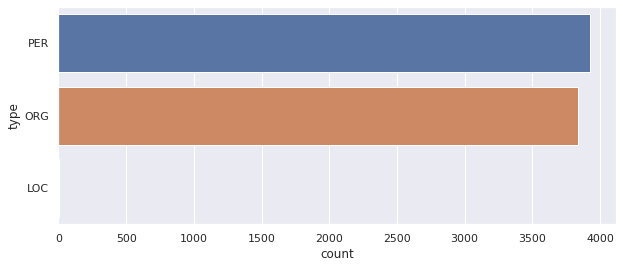

In [18]:
sns.set(rc = {'figure.figsize':(10,4)})
sns.countplot(y='type', data=df_test_sub, order=df_test_sub['type'].value_counts().index)


In [19]:
df_test_sub['type'].value_counts()

PER    3925
ORG    3839
LOC       1
Name: type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='type'>

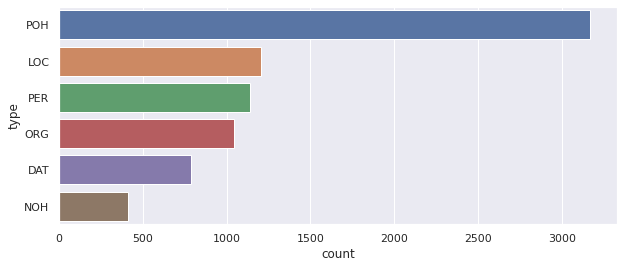

In [20]:
arr = []

for i in range(df_test.shape[0]):
    arr.append((eval(df_test['object_entity'].iloc[i]))["type"])

df_test_obj = pd.DataFrame(arr)
df_test_obj.columns = ['type']

sns.set(rc = {'figure.figsize':(10,4)})
sns.countplot(y='type', data=df_test_obj, order=df_test_obj['type'].value_counts().index)


In [ ]:
df